# Module 2 (Data visualization and Technical Analysis)

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
1. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
2. This would be helpful if we are to train our model to take NLP inputs.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functools import partial
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("week2.csv")#loading week2.csv file
del data['Unnamed: 0']
raw_data = data 
data.head()#loading first few lines of week2.csv file

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,1559.500000,0.000000,Slight or No change
1,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,1563.904498,0.004521,Slight or No change
2,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,1559.460361,-0.008969,Slight or No change
3,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,1552.683515,-0.009952,Slight or No change
4,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,1545.873479,-0.010702,Slight or No change


In [4]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data.Date.dtype

dtype('<M8[ns]')

In [5]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,HDFC,EQ,1549.80,1554.50,1572.60,1554.10,1561.00,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25,5,2017,1559.500000,0.000000,Slight or No change
2017-05-16,HDFC,EQ,1559.50,1558.00,1569.00,1554.00,1568.00,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13,5,2017,1563.904498,0.004521,Slight or No change
2017-05-17,HDFC,EQ,1566.55,1565.50,1570.95,1549.75,1550.10,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02,5,2017,1559.460361,-0.008969,Slight or No change
2017-05-18,HDFC,EQ,1552.50,1547.00,1558.60,1526.50,1545.00,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44,5,2017,1552.683515,-0.009952,Slight or No change
2017-05-19,HDFC,EQ,1537.05,1545.00,1548.00,1515.35,1526.50,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74,5,2017,1545.873479,-0.010702,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HDFC,EQ,1965.45,1974.80,2009.15,1959.20,1964.50,1966.30,1983.01,2683956,5.322315e+09,114029,1522276,56.72,5,2019,1821.743908,0.000432,Slight or No change
2019-05-08,HDFC,EQ,1966.30,1964.50,1964.50,1925.05,1930.10,1930.75,1941.55,3626183,7.040422e+09,151779,2378973,65.61,5,2019,1822.028003,-0.018080,Slight or No change
2019-05-09,HDFC,EQ,1930.75,1926.00,1931.60,1901.30,1914.15,1914.60,1918.15,1932792,3.707382e+09,130444,1132999,58.62,5,2019,1822.156420,-0.008365,Slight or No change


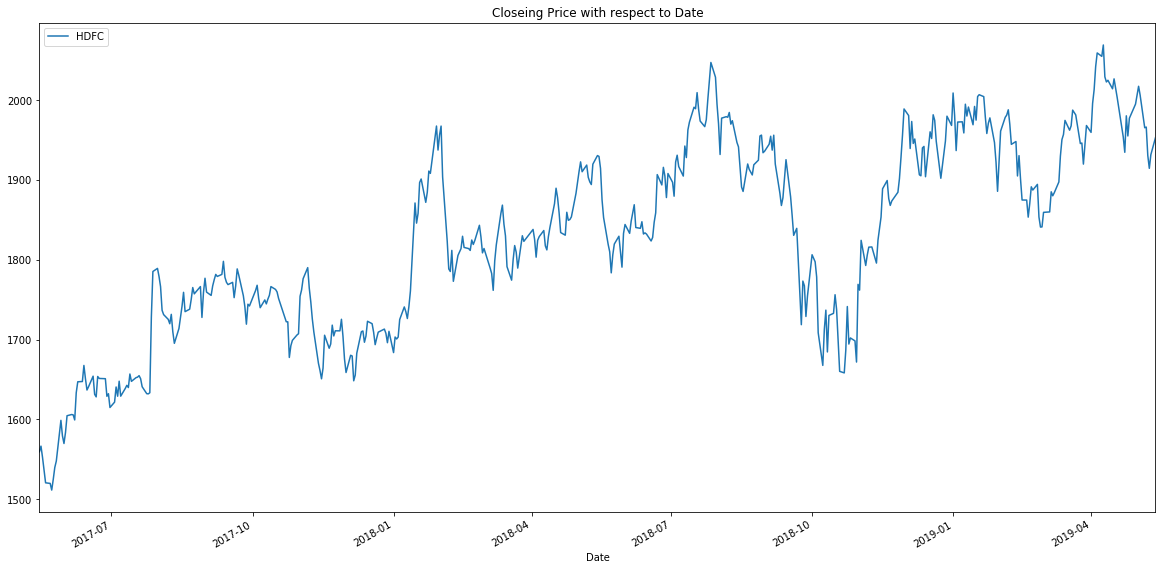

In [6]:
%matplotlib inline
data['Close Price'].plot(label='HDFC',figsize=(20,10),title="Closeing Price with respect to Date")
plt.legend()

In [7]:
data['Close Price'].diff().abs().sort_values(ascending= False)

Date
2018-09-24    120.70
2018-01-15    110.25
2018-10-31     97.35
2017-07-27     94.75
2018-02-05     80.50
               ...  
2017-07-25      0.20
2017-10-24      0.10
2019-02-18      0.05
2017-11-27      0.05
2017-05-15       NaN
Name: Close Price, Length: 494, dtype: float64

In [8]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# On finding dates, the news were availabe for following dates. 
# 1. Jan 15, 2018
# 2. Jul 27, 2018
# 3. Oct 19, 2018  

news_url_15_01 = 'https://www.moneycontrol.com/news/business/stocks/buy-hdfc-bank-says-mitessh-thakkar-2483539.html'
news = requests.get(news_url_15_01) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Jan 15, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print('\n')
news_url_27_07 = 'https://www.moneycontrol.com/news/business/companies/ihh-open-offer-for-fortis-to-commence-on-sept-7-2773941.html'
news = requests.get(news_url_27_07) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Jul 27, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')
print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print('\n')
news_url_19_10 = 'https://www.moneycontrol.com/news/business/markets/hdfc-bank-q2-earnings-preview-watch-out-for-these-5-key-factors-3065021.html'
news = requests.get(news_url_19_10) 
#Printing news content 
soup = BeautifulSoup(news.content,"html.parser")
News_title = soup.find('div',class_ = 'article_box')
News_subhead = soup.find('div',class_ = 'brk_wraper clearfix')
News_body = soup.find('div',class_ = 'arti-flow')
print("News for Oct 19, 2018")
print('\n')
print("Title:")
print (News_title.h1.text)
print('\n')
print("Subject:")
print (News_subhead.h2.text)
print('\n')
print("Report:")
for p in News_body:
    Report = soup.find('p').text
print(Report)
print('\n')

News for Jan 15, 2018


Title:
Buy HDFC Bank, says Mitessh Thakkar


Subject:
Mitessh Thakkar of mitesshthakkar.com advises buying HDFC Bank.


Report:
Time to reset economy


///////////////////////////////////////////////////////////////////////////////////////////////////////////////


News for Jul 27, 2018


Title:
IHH open offer for Fortis to commence on Sept 7


Subject:
A draft letter of the offer to Fortis shareholders was submitted to the bourses by the managers to open offer -- HSBC Securities and Capital Markets (India) Pvt Ltd, HDFC Bank Ltd, Citigroup Global Markets India Pvt Ltd and Deutsche Equities India Pvt Ltd.


Report:
Time to reset economy


///////////////////////////////////////////////////////////////////////////////////////////////////////////////


News for Oct 19, 2018


Title:
HDFC Bank Q2 earnings preview: Watch out for these 5 key factors


Subject:
Asset quality is also expected to remain stable for the quarter on sequential basis.


Report:
Time to reset

# Problem Statement 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

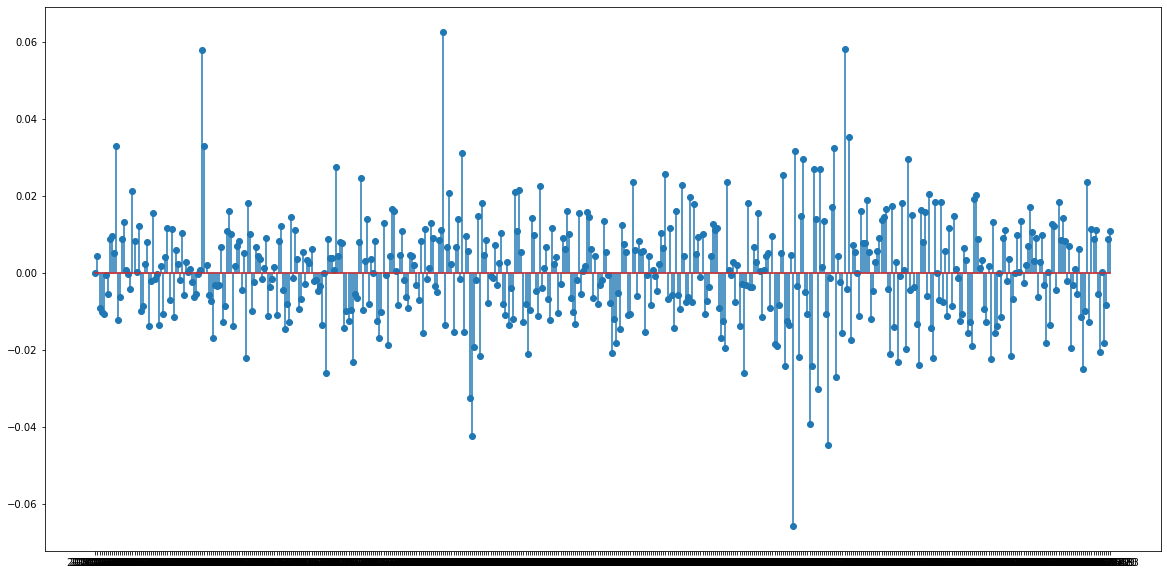

In [9]:
import matplotlib.pyplot as plt 
data = pd.read_csv("week2.csv")
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

# Problem Statement 2.3 

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

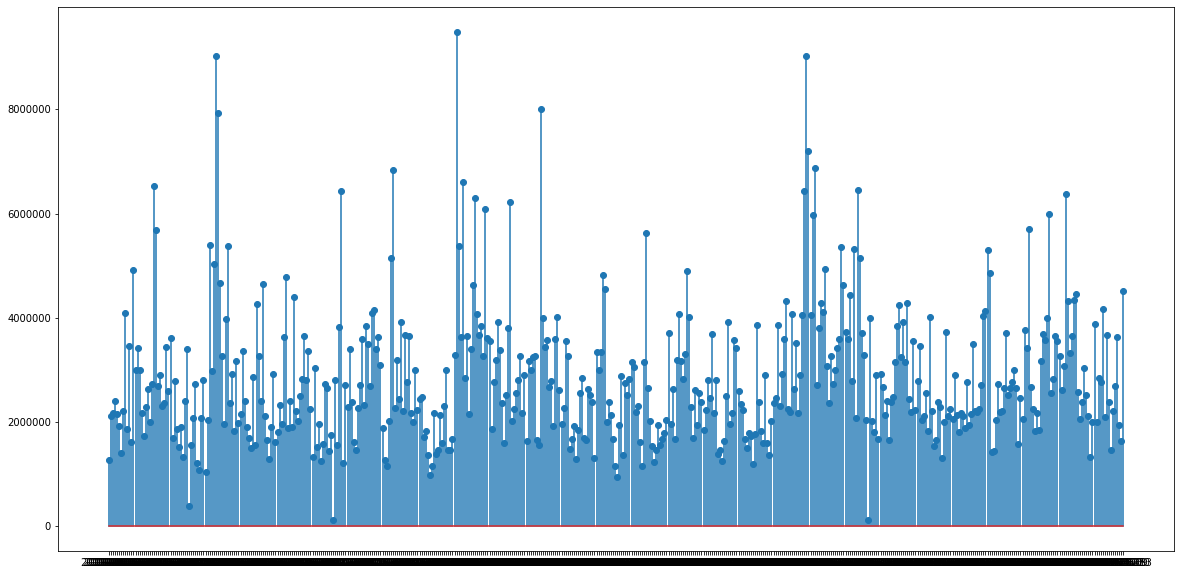

In [10]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


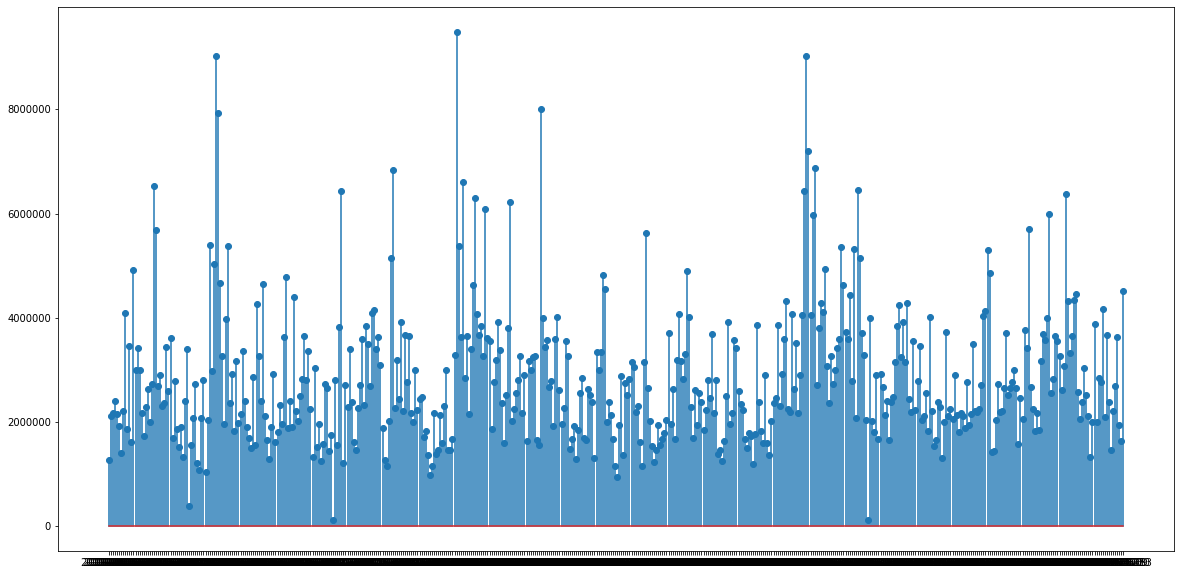

In [11]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])
plt.show()

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


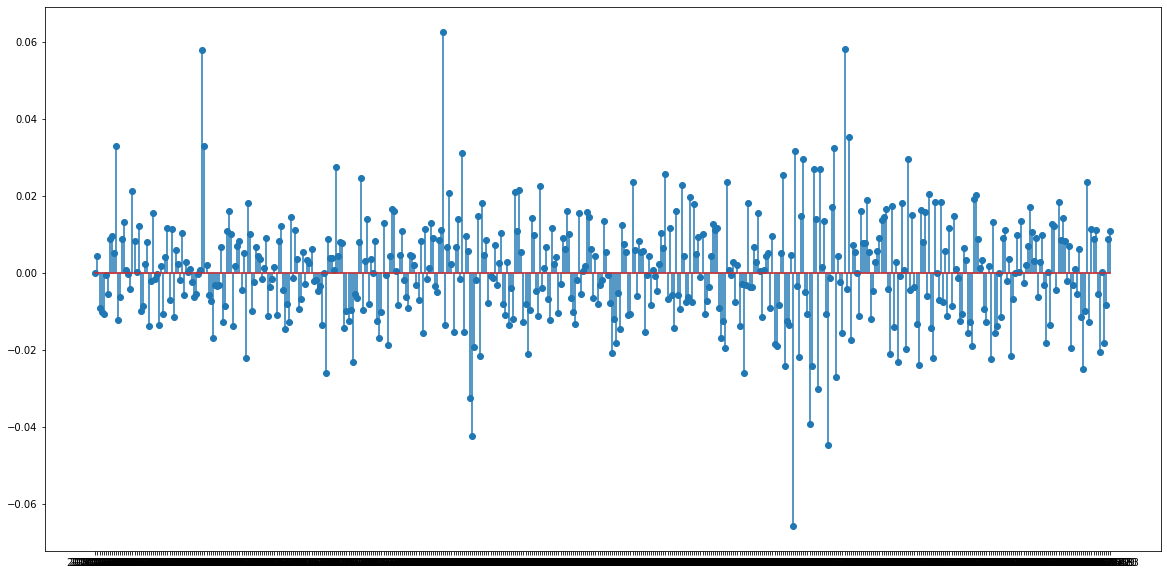

In [12]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
plt.show()

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


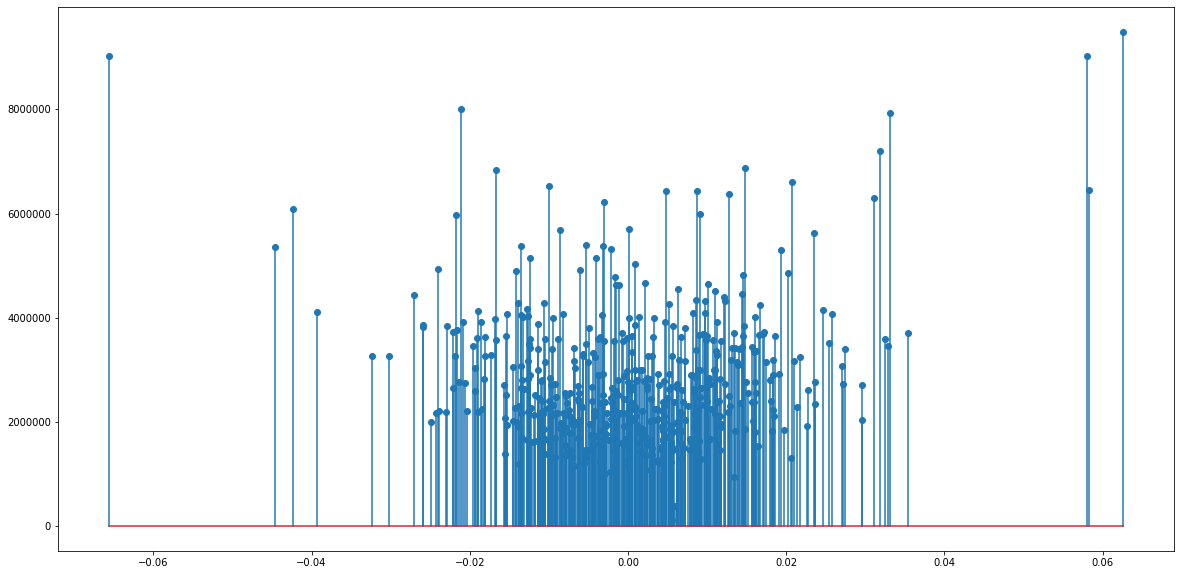

In [13]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()

C:\Users\skart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


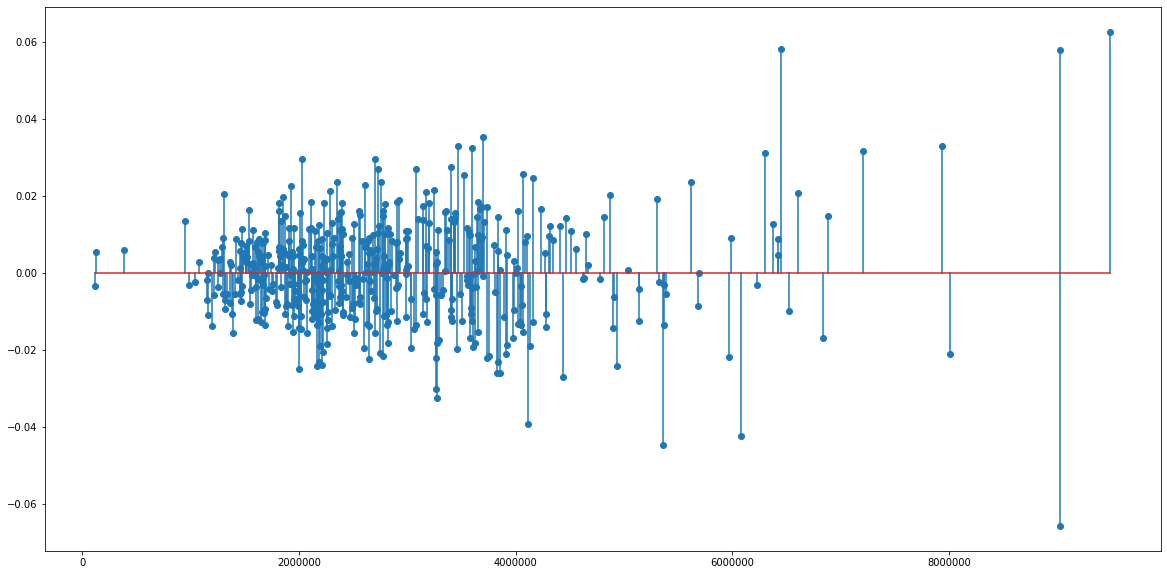

In [14]:
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

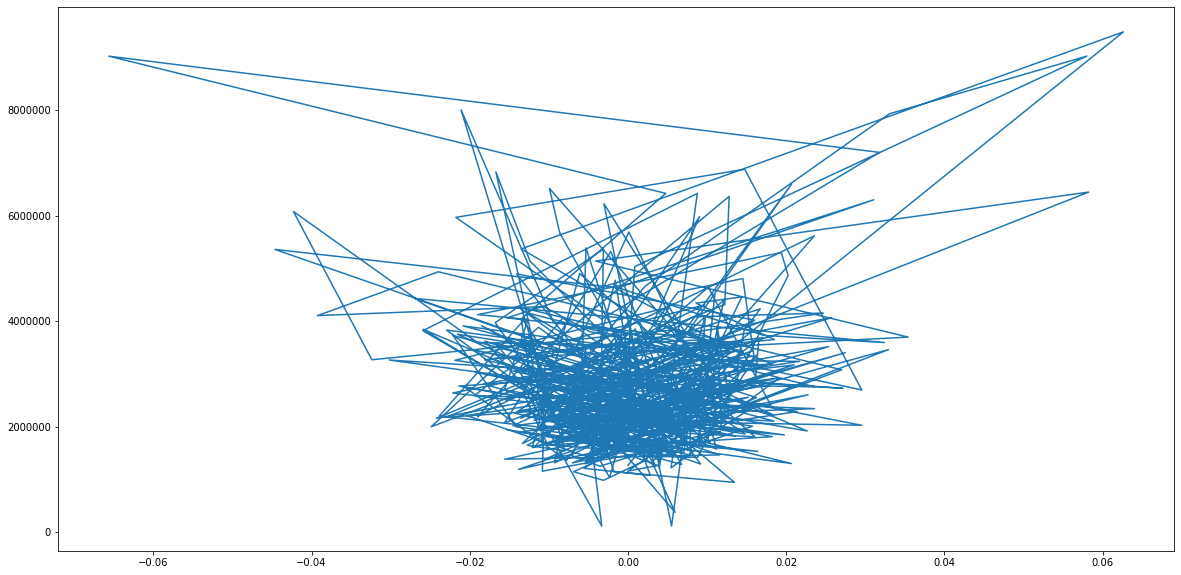

In [15]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()

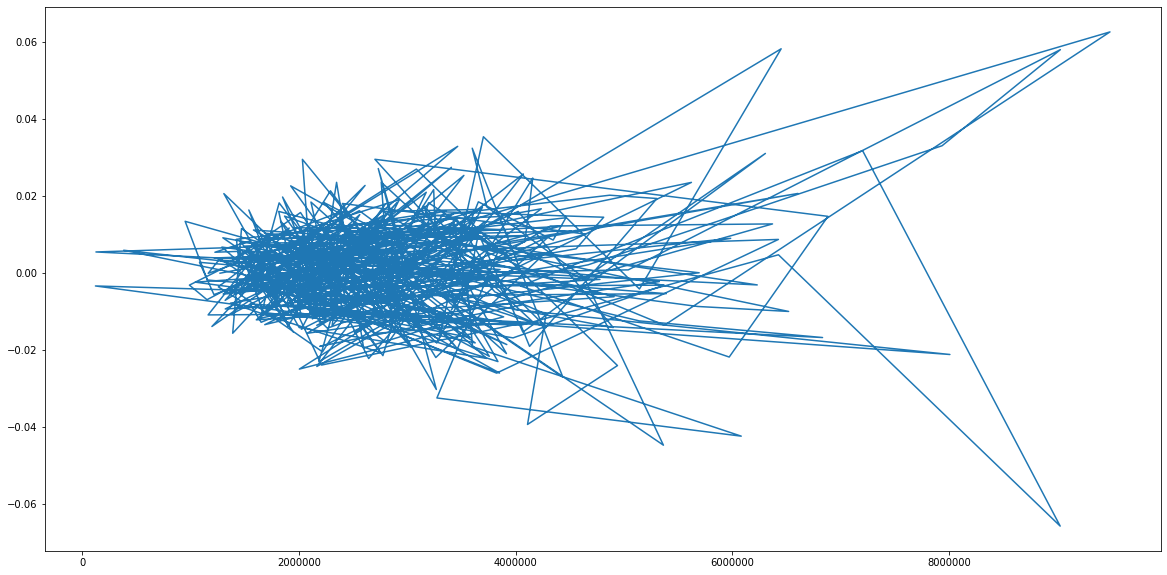

In [16]:
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

# Problem Statement 2.4

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

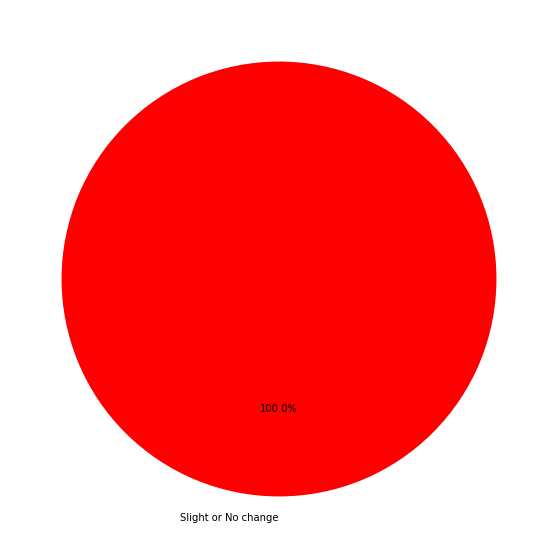

In [18]:
# So we only have 1 trend so there will be only 1 color pie chart 
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [19]:
# We will find the average of each trend type
# here we only have 1 trend which is Slight or No change hence only 1 bar graph
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,2.832844e+06,1.305206e+06,119832.0,1961598.25,2557129.0,3455177.75,9486397.0


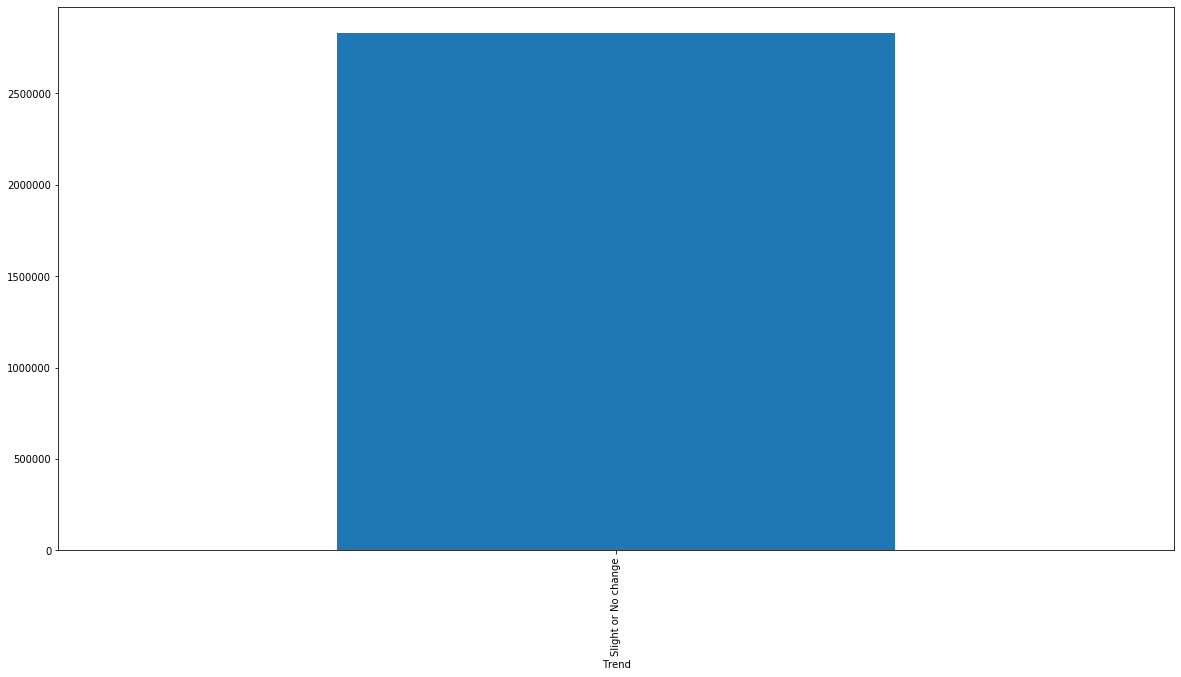

In [20]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

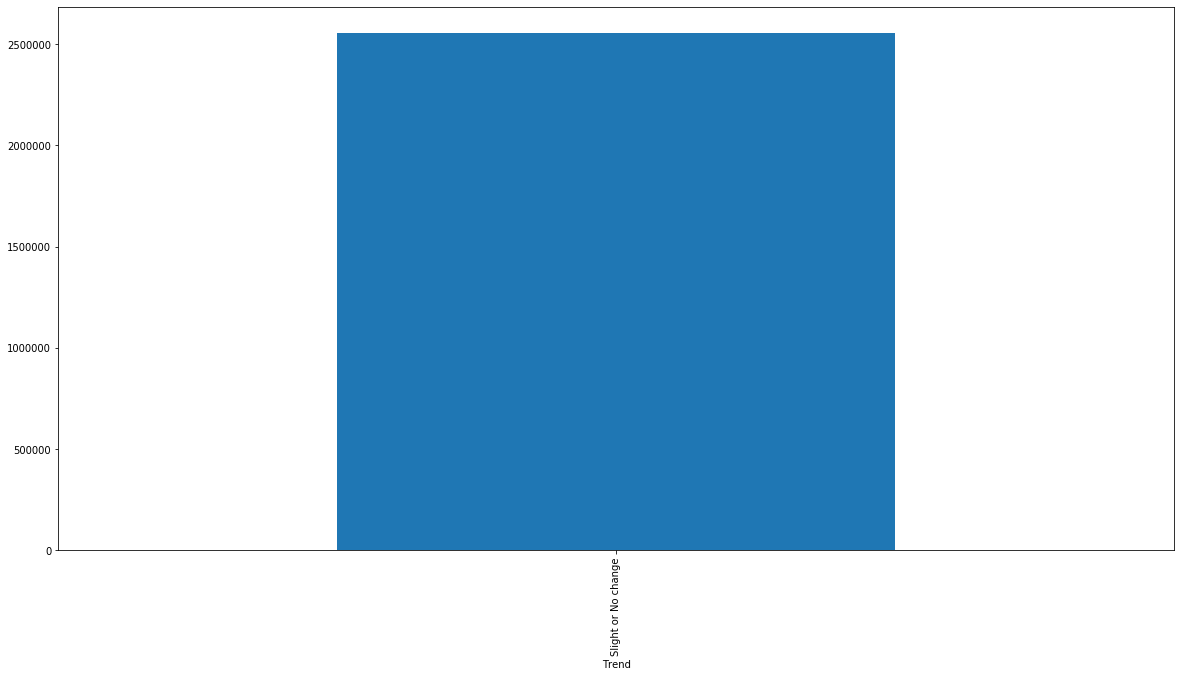

In [21]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Problem Statement 2.5

Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

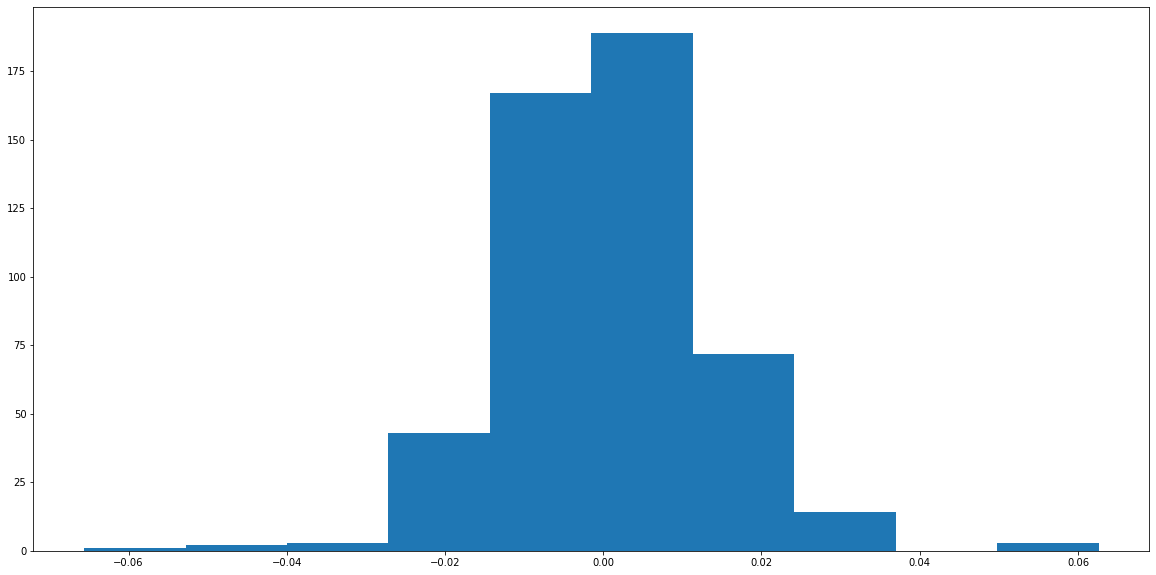

In [22]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# Problem Statement 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [23]:
import pandas as pd
mindtree_data = pd.read_csv('mindtree.csv')
tcs_data = pd.read_csv('tcs.csv')
itc_data = pd.read_csv('itc.csv')
reliance_data = pd.read_csv('reliance.csv')
voltas_data = pd.read_csv('voltas.csv')


In [24]:
mindtree_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,MINDTREE,EQ,07-May-2019,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20
490,MINDTREE,EQ,08-May-2019,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54
491,MINDTREE,EQ,09-May-2019,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89
492,MINDTREE,EQ,10-May-2019,980.45,980.40,982.90,973.00,974.00,975.35,977.55,215170,2.103396e+08,5128,26734,12.42


In [25]:
tcs_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [26]:
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ITC,EQ,07-May-2019,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
492,ITC,EQ,08-May-2019,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
493,ITC,EQ,09-May-2019,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35
494,ITC,EQ,10-May-2019,299.85,300.00,300.45,296.90,297.15,297.75,298.68,6904657,2.062297e+09,132469,4024203,58.28


In [27]:
reliance_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,RELIANCE,EQ,07-May-2019,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
491,RELIANCE,EQ,08-May-2019,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
492,RELIANCE,EQ,09-May-2019,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65
493,RELIANCE,EQ,10-May-2019,1256.45,1265.00,1277.70,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69


In [28]:
voltas_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [29]:
mindtree = mindtree_data[mindtree_data.Series == 'EQ']
mindtree

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,MINDTREE,EQ,07-May-2019,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20
490,MINDTREE,EQ,08-May-2019,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54
491,MINDTREE,EQ,09-May-2019,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89
492,MINDTREE,EQ,10-May-2019,980.45,980.40,982.90,973.00,974.00,975.35,977.55,215170,2.103396e+08,5128,26734,12.42


In [30]:
tcs = tcs_data[tcs_data.Series == 'EQ']
tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [31]:
itc = itc_data[itc_data.Series == 'EQ']
itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ITC,EQ,07-May-2019,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
492,ITC,EQ,08-May-2019,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
493,ITC,EQ,09-May-2019,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35
494,ITC,EQ,10-May-2019,299.85,300.00,300.45,296.90,297.15,297.75,298.68,6904657,2.062297e+09,132469,4024203,58.28


In [32]:
reliance = reliance_data[reliance_data.Series == 'EQ']
reliance

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,RELIANCE,EQ,07-May-2019,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81
491,RELIANCE,EQ,08-May-2019,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38
492,RELIANCE,EQ,09-May-2019,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65
493,RELIANCE,EQ,10-May-2019,1256.45,1265.00,1277.70,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69


In [33]:
voltas = voltas_data[voltas_data.Series == 'EQ']
voltas

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [34]:
import pandas as pd

columns = ['Mindtree','TCS','ITC','Reliance','Voltas']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['Mindtree'] = mindtree['Close Price']
close_prices_dataFrame['TCS'] = tcs['Close Price']
close_prices_dataFrame['ITC'] = itc['Close Price']
close_prices_dataFrame['Reliance'] = reliance['Close Price']
close_prices_dataFrame['Voltas'] = voltas['Close Price']
close_prices_dataFrame.dropna()

,Mindtree,TCS,ITC,Reliance,Voltas
0,509.45,2365.10,277.95,1344.10,431.85
1,511.30,2429.15,283.45,1356.30,432.45
2,506.35,2455.35,281.65,1353.10,430.20
3,492.90,2536.20,277.90,1327.35,414.10
4,497.50,2507.15,286.20,1318.85,415.75
...,...,...,...,...,...
489,979.95,2260.35,304.25,1384.90,601.45
490,980.50,2215.40,307.00,1343.50,576.65
491,980.45,2132.00,301.90,1299.45,574.10
492,975.35,2157.85,300.65,1256.45,580.05


In [35]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,Mindtree,TCS,ITC,Reliance,Voltas
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003631,0.027081,0.019788,0.009077,0.001389
2,-0.009681,0.010786,-0.006350,-0.002359,-0.005203
3,-0.026563,0.032928,-0.013314,-0.019030,-0.037424
4,0.009333,-0.011454,0.029867,-0.006404,0.003985
...,...,...,...,...,...
489,-0.001833,0.009738,-0.002459,-0.017000,-0.007590
490,0.000561,-0.019886,0.009039,-0.029894,-0.041234
491,-0.000051,-0.037646,-0.016612,-0.032787,-0.004422
492,-0.005202,0.012125,-0.004140,-0.033091,0.010364


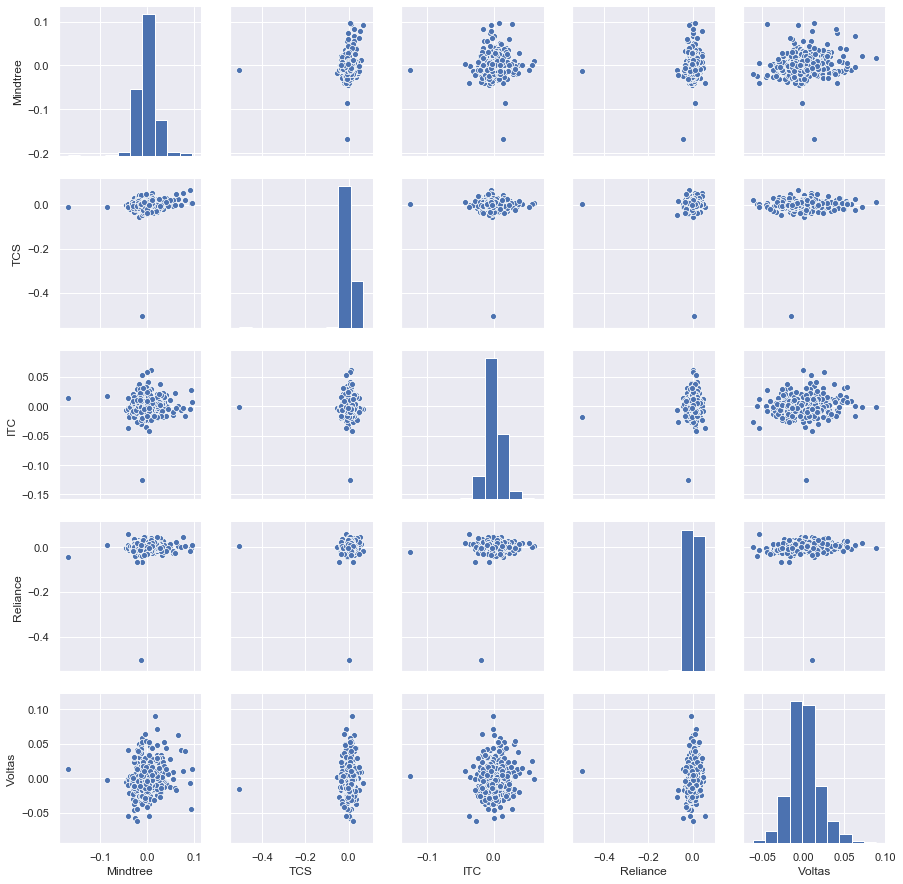

In [36]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

# Problem Statement 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [37]:
import matplotlib.pyplot as plt
rolling_avg_mindtree = pct_change_dataFrame['Mindtree'].rolling(7).mean()
rolling_avg_mindtree

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
489    0.000123
490   -0.001255
491    0.000694
492   -0.000840
493   -0.000313
Name: Mindtree, Length: 494, dtype: float64

In [38]:
sd_mindtree = rolling_avg_mindtree.fillna(0).std()
sd_mindtree

0.008425097750749028

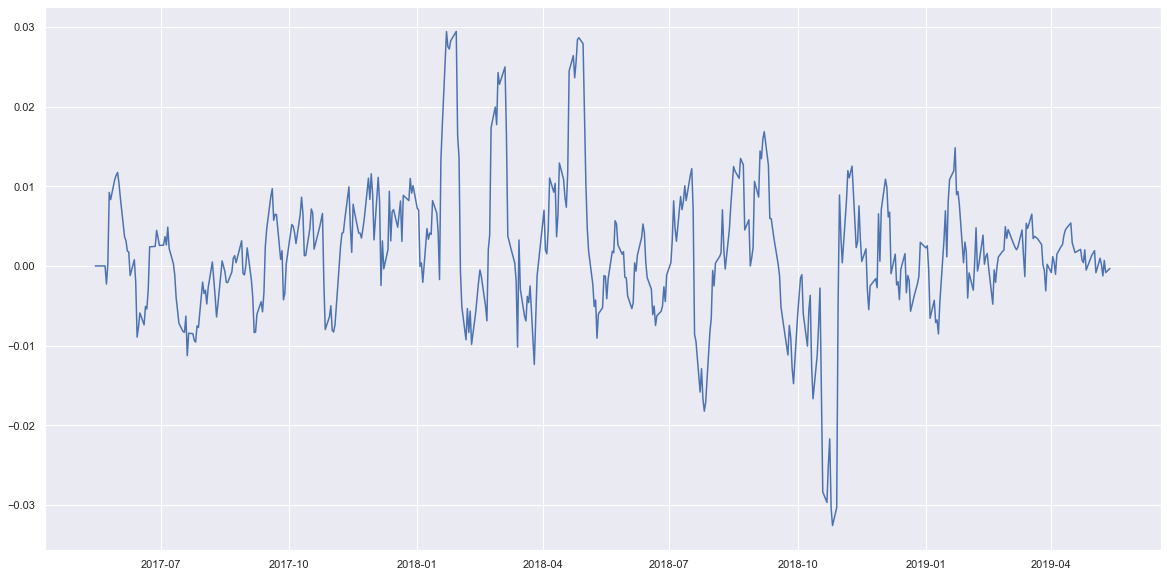

In [39]:
import pandas as pd
crrDate = pd.to_datetime(mindtree['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_mindtree.fillna(0).tolist())
plt.show()

# Problem Statement 2.8

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [40]:
nifty_load = pd.read_csv('NIFTY50.csv')
nifty_load

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


<Figure size 1440x720 with 0 Axes>

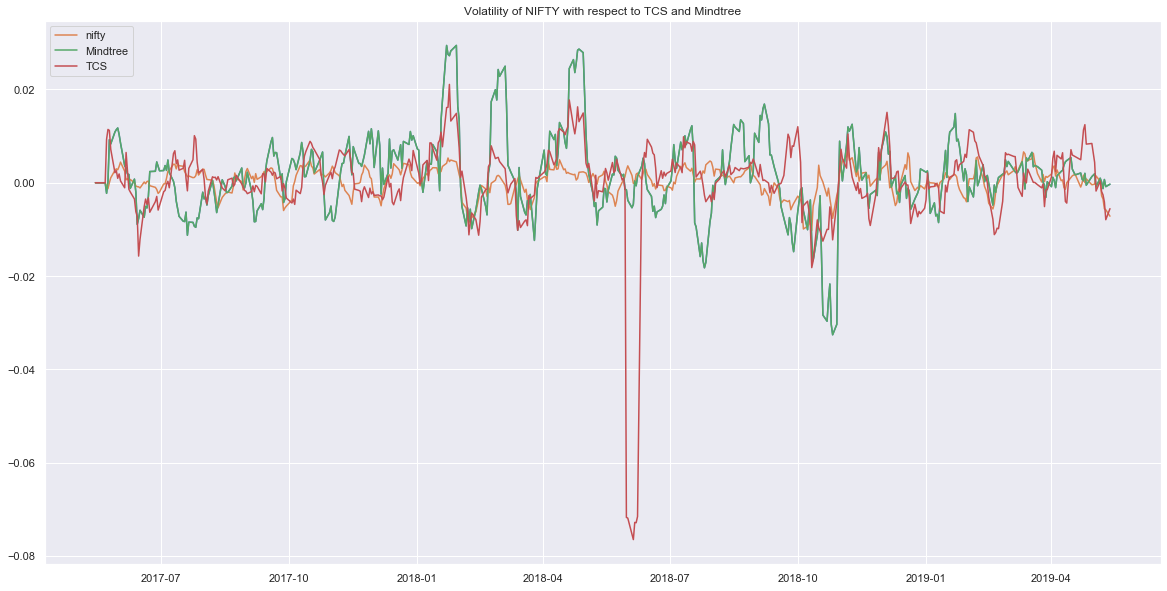

In [42]:
nifty_close_price = nifty_load['Close']
nifty_change = nifty_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
niftyDate = pd.to_datetime(nifty_load['Date'])
niftyDate = niftyDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_mindtree.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to TCS and Mindtree")
plt.plot(niftyDate,nifty_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_mindtree.fillna(0).tolist(),label = 'Mindtree')
plt.plot(tcsLis,tcs_change,label = 'TCS')
plt.legend(loc='upper left')
plt.show()

# Problem Statement 2.9

Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

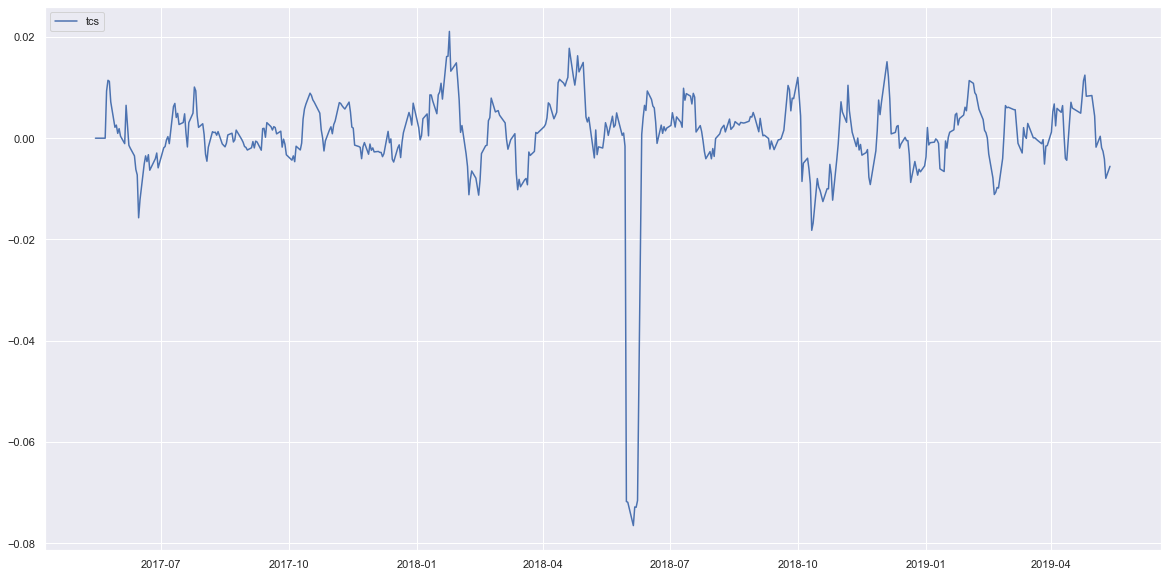

In [43]:
# we will use tcs stocks for applying buy/sell signals
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [46]:
import numpy as np
#making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

# tcs['Date'] = pd.to_datetime(tcs['Date'])
# tcs.set_index('Date', inplace=True)
# tcs

     signal   short_mavg    long_mavg  positions
0       0.0  2365.100000  2365.100000        NaN
1       0.0  2397.125000  2397.125000        0.0
2       0.0  2416.533333  2416.533333        0.0
3       0.0  2446.450000  2446.450000        0.0
4       0.0  2458.590000  2458.590000        0.0
..      ...          ...          ...        ...
493     1.0  2124.990476  2081.357353        0.0
494     1.0  2128.492857  2086.223529        0.0
495     1.0  2136.019048  2090.123529        0.0
496     1.0  2140.185714  2093.447059        0.0
497     1.0  2142.947619  2096.563235        0.0

[494 rows x 4 columns]


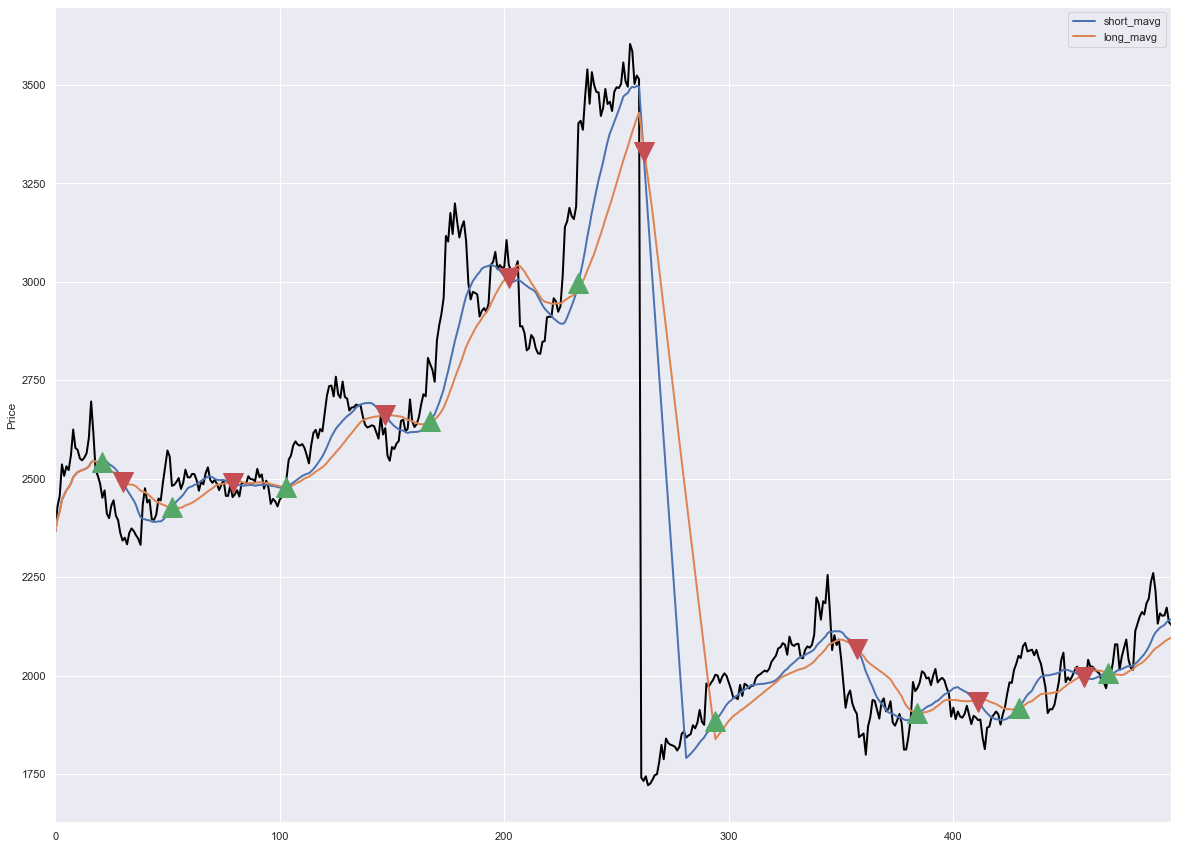

In [47]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# Problem Statement 2.10 

Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- The 14 day rolling mean of the closing price (we call it the average) Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Average Daily stock price. Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

ValueError: operands could not be broadcast together with shapes (522,) (498,) 

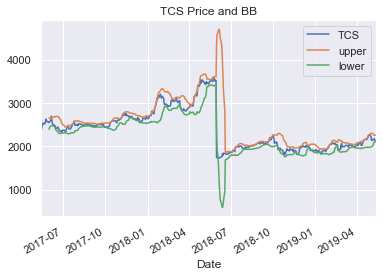

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TCS'
# read csv file, use date as index and read close as a column
df = pd.read_csv('tcs.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()